In [ ]:
# importing necessary libraries
import pandas as pd

In [ ]:
# providing the path of the csv file
Path='/content/drive/MyDrive/Colab Notebooks/data/insurance.csv'

In [ ]:
# read the csv file using the given path
df=pd.read_csv(Path)

In [ ]:
# getting the number of rows and columns in the data frame
df.shape

(1338, 7)

In [ ]:
# get the first five rows of the data frame
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Check the column names of the data frame
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# check the data type of each column
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
# getting the total number of entries, number of missing values and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observations:  
* All the column names are appropriate.  
* The data types of the columns are according to their values.  
* There are no missing values in the given data.  
* There are total of 1338 rows and 7 columns in the given dataset.

# Univariate Analysis:

**Non visual Statistical Analysis for age**

In [ ]:
# determining the statistical measures for the age column
print(df['age'].min())

print(df['age'].max())

print(df['age'].mean())

print(df['age'].median())

print(df['age'].std())

18
64
39.20702541106129
39.0
14.049960379216154


Observation:  
* From the above output, it can be observed that the ages of the primary benificiary ranges from 18 to 64. 
* The average age is almost similar to the median age, hence this shows that there are only very few outliers present in the data. 
* The standard deviation shows the spread of the data points with respect to the central tendency.

**Visualization analysis for age**

<Axes: >

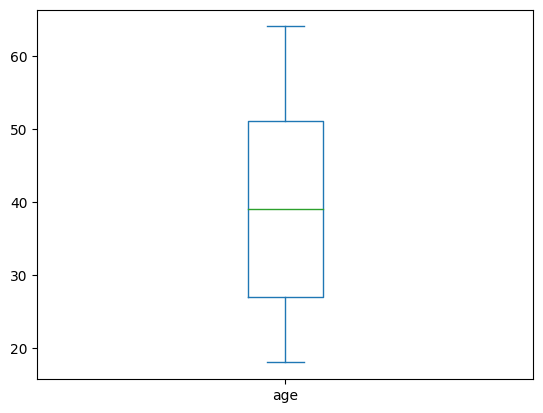

In [ ]:
# plot the box plot for the age
df['age'].plot(kind='box')

Observation:  
* From the above box plot, it can be observed that there are no outliers present in the age column. 
* We can also see observe the minimum,maximum and the median age from the above the plot.

<Axes: ylabel='Frequency'>

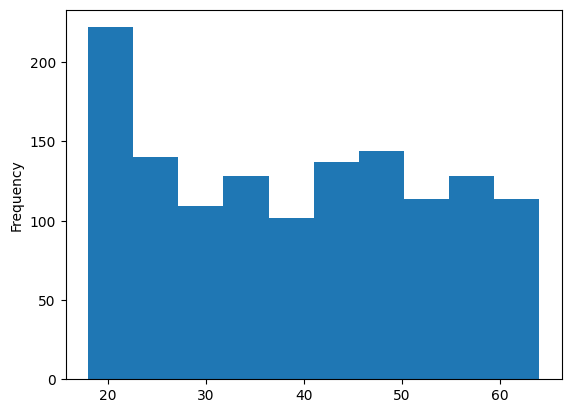

In [ ]:
# plot the histogram to understand the distribution of the data
df['age'].plot(kind='hist')

Observation:  
* From the histogram it can be seen that the ages of maximum number of primary benificiaries are from 18 to 23 which indicates that the maximum number of people who are applying for the health insurance are in the age group of 18 to 23.
*  The minimum number of people who have taken the health insurance are the age group of 36 to 42. 
* We can observe that the people who are at the beginning of their earning and who are at the age of retiring are more likely to take the health insurance compared to the remaining people.

**Analysis for sex column:**

In [ ]:
# determine the frequency of male anf female insurance contractor 
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Axes: >

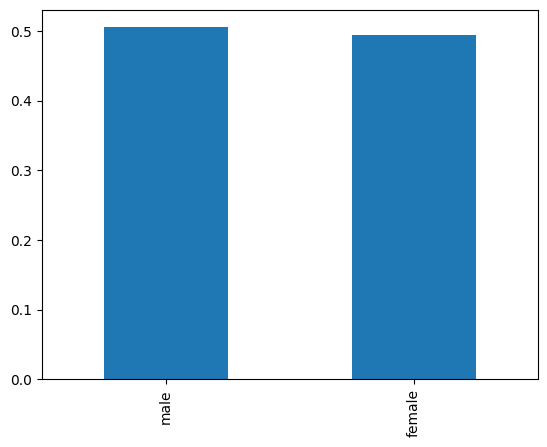

In [ ]:
df['sex'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* From the above plot, it can be seen that there are few more number of male insurance contractors than females.
* The probability of having a male insurance contractor is slightly higher than the probability of having a female insurance contractor.The bar plot shows the probability that the insurance contractors are male and female.

**Analysis for bmi:**

In [ ]:
# determining the statistical measures for the bmi column
print(df['bmi'].min())

print(df['bmi'].max())

print(df['bmi'].mean())

print(df['bmi'].median())

print(df['bmi'].std())

15.96
53.13
30.66339686098655
30.4
6.098186911679014


Observation:  
* The minimum value of bmi index is 15.96 which is less than the  actual ideal bmi index value.  
* The maximum value of bmi index is 53.13 which is two times higher than the actual bmi index value.  
* There are some people whose bmi value is less than the ideal bmi value and some people whose bmi value is higher than ideal bmi value.  
* The average and median bmi values are almost similar which indicates that there are few outliers present in the given column.

<Axes: >

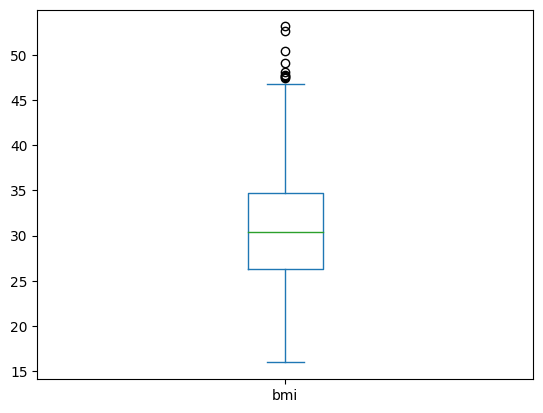

In [ ]:
# plot the box plot for the bmi
df['bmi'].plot(kind='box')

<Axes: ylabel='Frequency'>

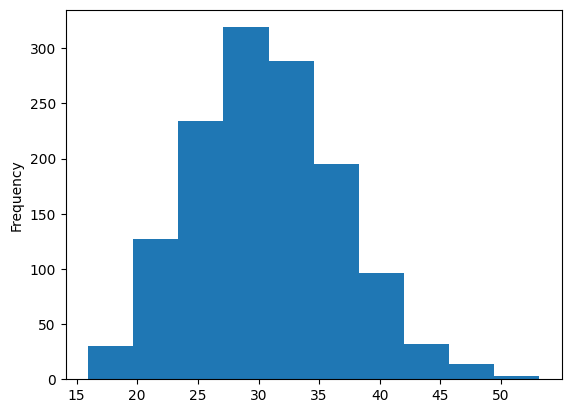

In [ ]:
# plot the histogram to understand the distribution of the data
df['bmi'].plot(kind='hist')

Observation:  
* From the box plot it can be observed that there are few outliers as few people have their bmi values greater than 45. 
* There are very few people with bmi greater than 50. Most of the people are having their bmi value greater than the ideal bmi value.

Outlier treatment:

In [ ]:
# remove the outlier values using IQR

# calculate 25th percentile
bmi_q1=df['bmi'].quantile(0.25)

# calculate 75th percentile
bmi_q3=df['bmi'].quantile(0.75)

IQR=bmi_q3-bmi_q1

# lower bound
bmi_lower_bound=bmi_q1-1.5* IQR

# upper bound
bmi_upper_bound=bmi_q3+1.5* IQR

# new data frame after removing the outliers
clean_df=df[(df['bmi']>bmi_lower_bound) & (df['bmi']<bmi_upper_bound)]


In [ ]:
# shape of the new data frame after removing outliers
clean_df.shape

(1329, 7)

<Axes: >

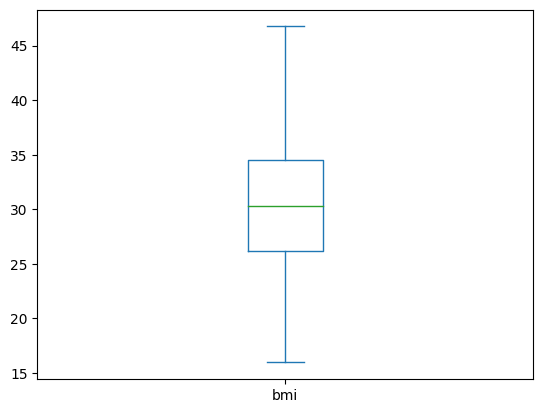

In [ ]:
# plot the box plot for the bmi
clean_df['bmi'].plot(kind='box')

<Axes: ylabel='Frequency'>

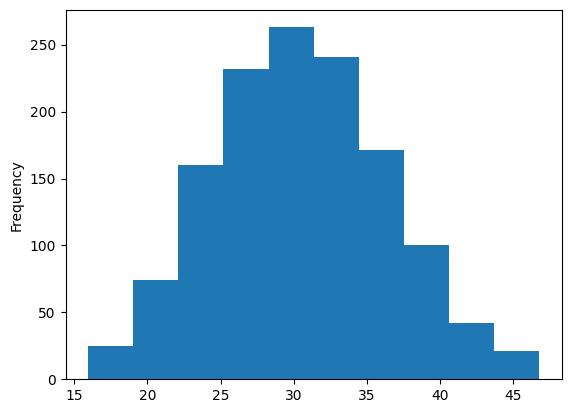

In [ ]:
# plot the histogram to understand the distribution of the data
clean_df['bmi'].plot(kind='hist')

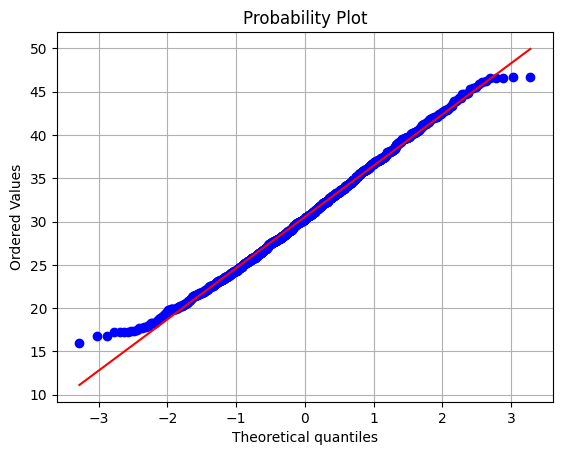

In [ ]:
# plot the QQ plot to validate the type of distribution
from scipy import stats
import matplotlib.pyplot as plt
stats.probplot(clean_df['bmi'],dist='norm',plot=plt)
plt.grid()

Observation:  
After the outlier treatment,
* we can observe that the data shows the normal distribution and the distribution is likely to be symmetric as shown in the histogram.
* By using the IQR, the outliers were removed hence there are no outliers as shown in the box plot.
* In the QQ plot almost major number of data points lie on the 45 degree straight line except for the few points where the bmi values are around 15 to 20 and 45 to 50 which indicate that few people have their bmi values showing high variation compared to the other people.

**Analysis for children:**

In [ ]:
# determining the statistical measures for the children column
print(clean_df['children'].min())

print(clean_df['children'].max())

print(clean_df['children'].mean())

print(clean_df['children'].median())

print(clean_df['children'].std())

0
5
1.0963130173062452
1.0
1.207928106960402


<Axes: >

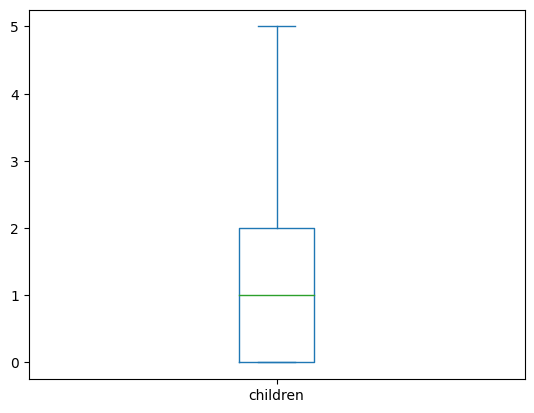

In [ ]:
# plot the box plot for the children
clean_df['children'].plot(kind='box')

<Axes: ylabel='Frequency'>

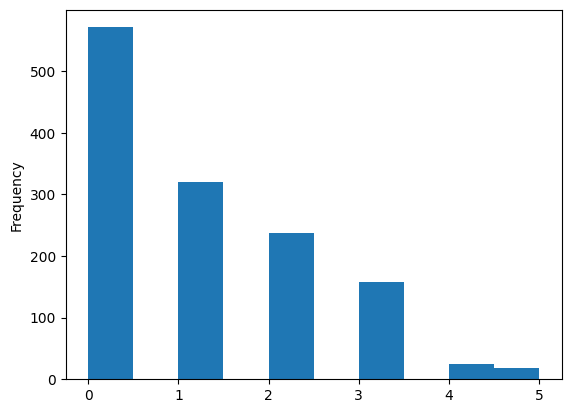

In [ ]:
# plot the histogram to understand the distribution of the data
clean_df['children'].plot(kind='hist')

Observation:  
From the above plots,   
* we can observe that the maximum number of people don't have children and remaining have either 1 or 2 or 3 children and very few number of people have 4 or 5 children.   
* It seems that maximum number of primary benificiaries are young and may be in the age of 18 to 30 and we can also see that as the number of children is increasing the frequency of the values is decreasing.  
* As shown in the box plot, we can see that the plot does not contain any outliers so the average number of children and median number of children are almost equal. On the average, number of children that primary benificiaries have is 1.

**Analysis for smoker:**

In [ ]:
# determine the frequency of smoker and non smoker 
clean_df['smoker'].value_counts()

no     1058
yes     271
Name: smoker, dtype: int64

* We can observe that the number of people who don't smoke are more than the number of people who smoke.  
* The number of smokers is 271.  
* The number of non smokers is 1058.

<Axes: >

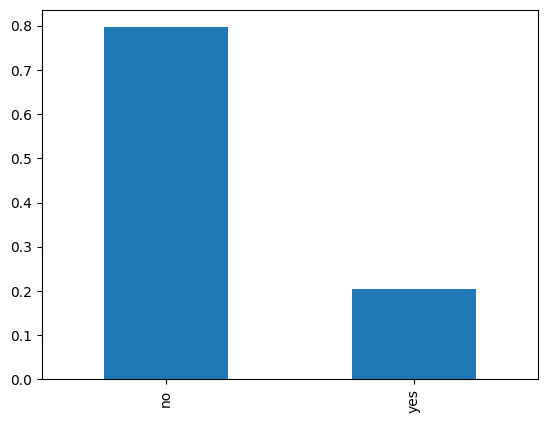

In [ ]:
# bar plot
clean_df['smoker'].value_counts(normalize=True).plot(kind='bar')

Observation:  
From the above bar graph,  
* we can observe that the probability that the primary benificiary is a not a smoker is 0.8.  
* The probability that the primary benificiary is a smoker is 0.2.  

**Analysis for region:**

In [ ]:
# determine the frequency of each region
clean_df['region'].value_counts()

southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64

* We can observe that maximum number of primary benificiaries are from southeast region of the country.  
* The minimum number of primary benificiaries are from northeast region of the country.  
* The count of people coming from northwest, southwest and northeast regions differ by one.

<Axes: >

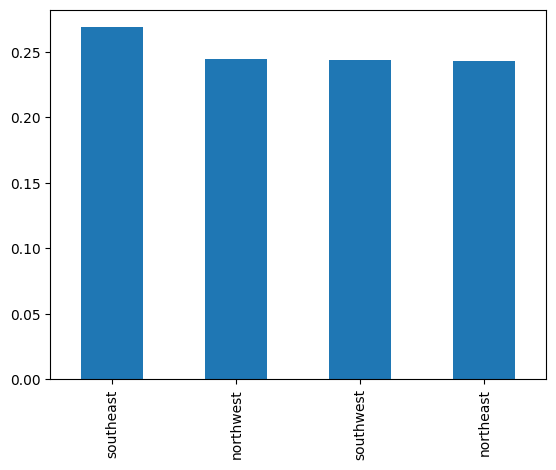

In [ ]:
# bar plot
clean_df['region'].value_counts(normalize=True).plot(kind='bar')

Observation:  
* From the above bar plot, we can observe the probabilities of people coming from southeast, northwest, southwest and northeast regions of US.
* The probability of people coming from southeast region of US is higher when compared to the other regions of US. The probabilities of people coming from remaining three regions of US are almost equal.

**Analysis for charges:**

In [ ]:
# determining the statistical measures for the charges column
print(clean_df['charges'].min())

print(clean_df['charges'].max())

print(clean_df['charges'].mean())

print(clean_df['charges'].median())

print(clean_df['charges'].std())

1121.8739
62592.87309
13212.33337437848
9361.3268
11997.236429208286


* The minimum charges that was billed by medical insurance is 1121.8739  
* The maximum charges that was billed by medical insurance is 62592.87309  
* There is a major difference between the minimum and maximum charges.  
* The average charge is 13212.33 and the median charge is 9361.32 which indicates that the mean and median are varying hence we can say that the outliers are present in the data.  
* The standard deviation shows the spread of the data with respect to the central tendency. 

<Axes: >

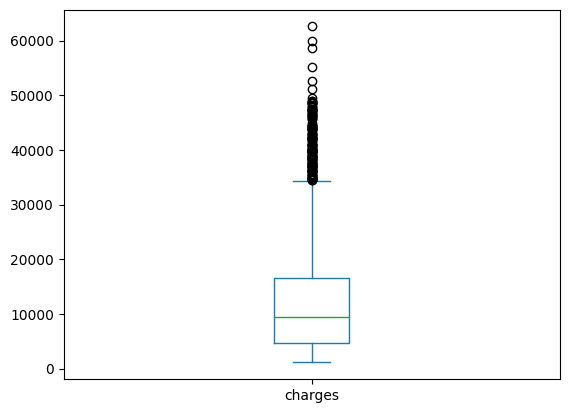

In [ ]:
# plot the box plot for the charges
clean_df['charges'].plot(kind='box')

<Axes: ylabel='Frequency'>

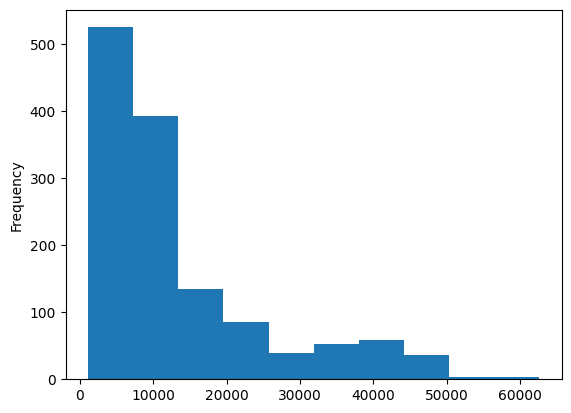

In [ ]:
# plot the histogram to understand the distribution of the data
clean_df['charges'].plot(kind='hist')

<Axes: ylabel='Density'>

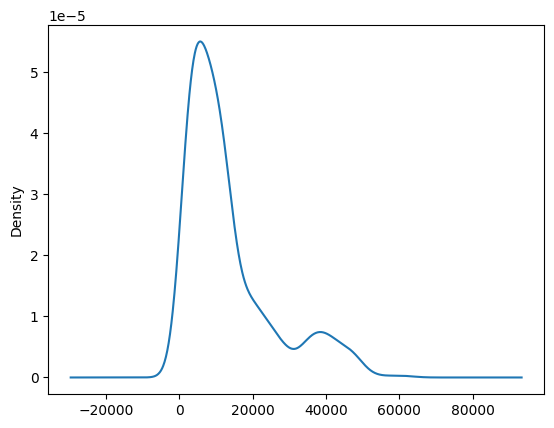

In [ ]:
# plot the kde to understand the distribution of the data
clean_df['charges'].plot(kind='kde')

Observation:  
* From the above plots, we can observe that the distribution is positively skewed and there are major number of outliers present as there are charges in the range of 50000 to 60000. 
* The frequency of charges below 10000 is high.
* Most of the charges billed by medical insurance are below 50000.
* There are only few cases where the medical costs exceeded 50000.

# Bivariate Analysis:

**Analysis for age and Charges:**

<Axes: xlabel='age', ylabel='charges'>

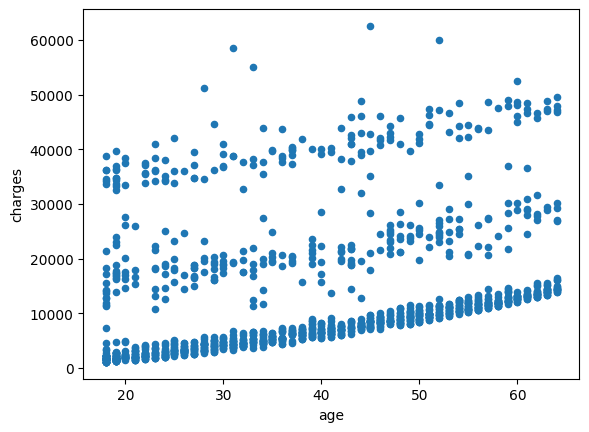

In [ ]:
# scatter plot to find the relation between age and charges
clean_df.plot(kind='scatter',x='age',y='charges')

Observation:
From the above graph, we can observe the relation between age and charges.
* The primary benificiaries below the age of 20 have the medical charges from minimum amount of 0 upto 40000.
* In the age group of 20 to 30, the minimum medical charge is below 5000 and the maximum charge is 40000.
* Few people of age group 30 to 40 and 40 to 50 and 50 to 60 have their medical charges greater than 50000 which is higher than the charges of other age groups.  
* These data points are the outliers in the data where the charges is maximum.  
* As the age is increasing there is an increase in the charges.  
* We can conclude that the age and charges are positively correlated that is the charges depends on the age of the primary benificiary.

**Analysis for sex and charges:**

<Axes: title={'center': 'charges'}, xlabel='sex'>

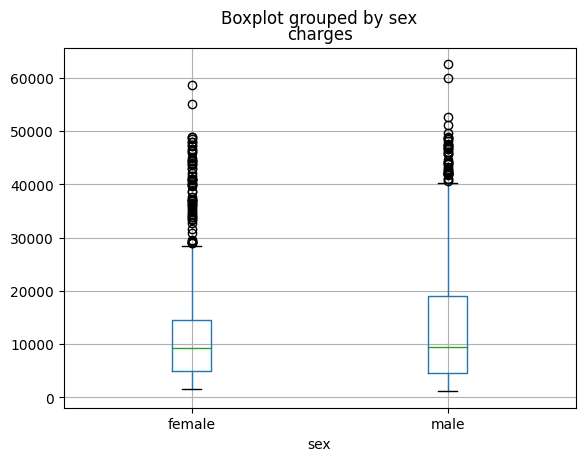

In [ ]:
# box plot to find the relation between sex and charges
clean_df.boxplot(by='sex',column='charges')

Observation:  
From the above plot, we can observe the relation between sex and charges.  
* The minimum charges of male and female primary benificiaries is equal.  
* In case of female patients, the maximum number of charges are in the range of 5000 to 15000.  
* In case of male patients, the maximum number of charges are in the range of 5000 to 20000.  
* We can see the major number of outliers in female patients which indicates that their medical expenses is higher than the average charges of all the female patients.  
* In the male patients there are outliers less in count when compared to the female patients.  
* The maximum charges of the female benificiaries is in the range of 50000 to 60000 but in the case of male benificiaries it is greater than 60000 which is higher female charges.  
* We can conclude that the male benificiaries have higher charges than female benificiaries but some of the female benificiaries have charges higher than their average charges. 


**Analysis for bmi and charges:**

<Axes: xlabel='bmi', ylabel='charges'>

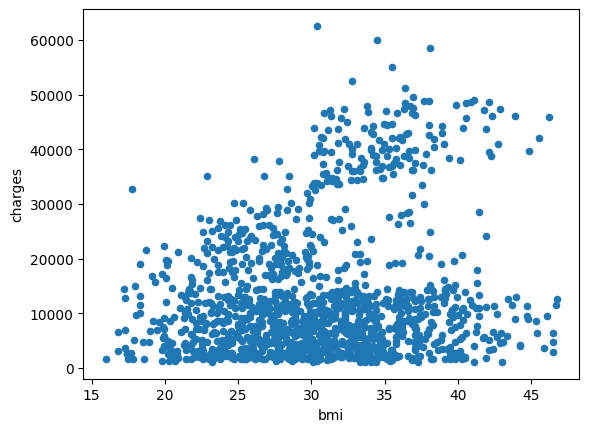

In [ ]:
# scatter plot to find the relation between bmi and charges
clean_df.plot(kind='scatter',x='bmi',y='charges')

Observation:  
From the above plot, we can observe the relation between bmi and charges.  
* Most of the primary benificiaries have their bmi higher than the ideal bmi which is from 18.5 to 24.9 .  
* The people having their bmi less than 25 have medical charges upto 30000.  
* Only few people having bmi less than 25 have charges greater than 30000.  
* The people having bmi greater than 30 have higher medical charges with maximum charges of 60000.  
* As there is an increase in bmi there is an slight increase in the charges hence there exists correlation between bmi and the charges.

**Analysis for children and charges:**

<Axes: xlabel='children', ylabel='charges'>

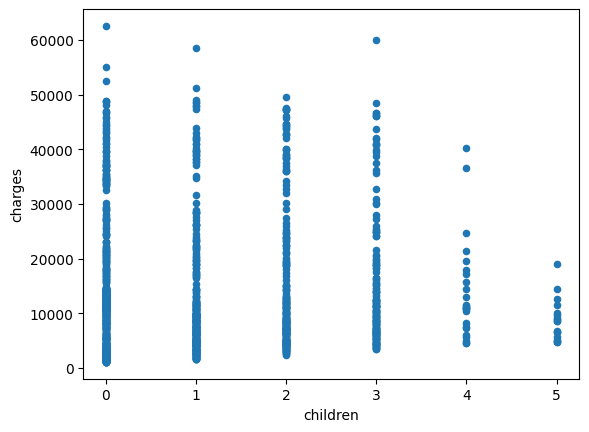

In [ ]:
# scatter plot to find the relation between children and charges
clean_df.plot(kind='scatter',x='children',y='charges')

Observation:  
From the above plot, we can observe the relation between the number of children and charges.  
* The benificiaries with no children have the maximum medical charges than the other benificiaries.  
* The benificiaries with highest number of children have the lowest medical charges when compared to others.
* As the number of children are increasing, there is a decrease in the charges which indicates an inverse relationship.
* Hence we can conclude that children and charges are negatively correlated.

**Analysis for smoker and charges:**

<Axes: title={'center': 'charges'}, xlabel='smoker'>

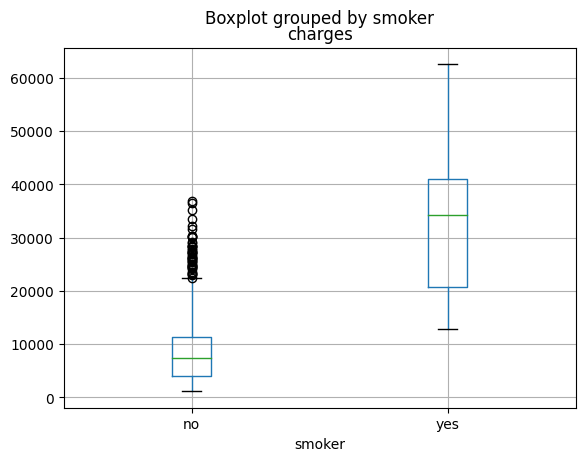

In [ ]:
# box plot to find the relation between smoker and charges
clean_df.boxplot(by='smoker',column='charges')

Observation:  
From the above plot, we can observe the relation between smoker and charges.
* The benificiaries who don't smoke have minimum medical charges when compared to the people who smoke.  
* There are few outliers in the non smokers which indicates that the charges for some of the beneficiaries is higher than the average charges of all the non smokers.
* We can conclude that medical expenses of the smokers is higher than the non smokers.
* Hence charges depend on whether the benificiary smokes or not.

**Analysis for region and charges:**

<Axes: title={'center': 'charges'}, xlabel='region'>

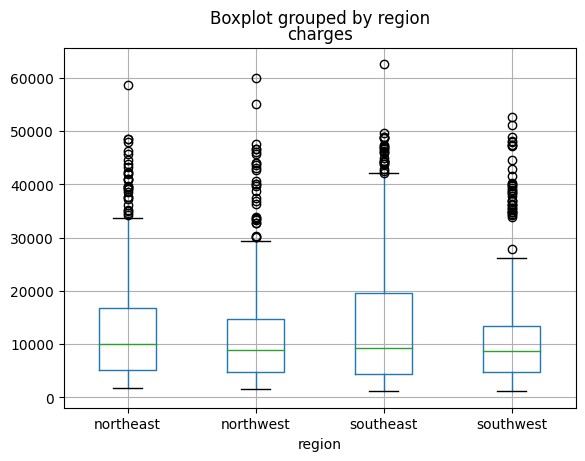

In [ ]:
# box plot to find the relation between region and charges
clean_df.boxplot(by='region',column='charges')

Observation:
From the above graph, we can see the relation between region and charges.  
* The minimum charges is same for the beneficiaries coming from all the four regions.  
* There are outliers in all the four regions which indicates there are people from these regions who have their medical expenses higher than their average charges.  
* The maximum value of the charges is greater than 60000 for the beneficiaries coming from southeast region.
* The beneficiaries coming from southwest region have least medical charges compared to beneficiaries coming from the other regions.
* The least number of outliers are in southeast region which indicates that the only few beneficiaries coming from that region have their charges higher than the average charges for that region.
* We can conclude that there exists the relation between the beneficicaries region and their charges.

# Multivariate Analysis:

In [ ]:
import seaborn as sns

<ipython-input-42-910b6ddec4b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_df.corr()


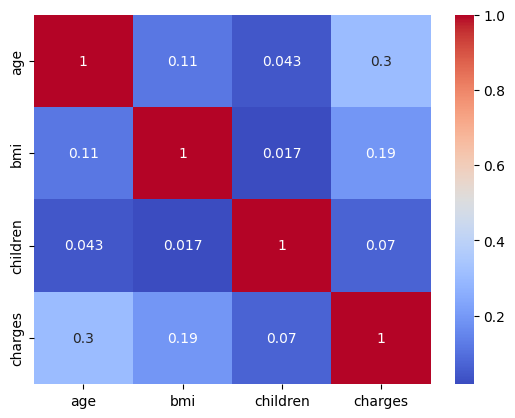

In [ ]:
# select the numeric columns from data frame
corr = clean_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
  
# displaying the plotted heatmap
plt.show()

Observation:
* From the above plot, we can observe the relation between all the numeric variables.
* We can see that all the columns have positive correlation.
* The highest correlation is between age and charges and the least correlation is between children and bmi.
* We can conclude the intensity of positive correlation between the columns and how one column is varying with change in the other column. 

# Conclusion:  


From the data analysis on the given Health Insurance data, the following Insights are drawn:  
* The most of the primary benificiaries are in the age group of 25 to 50.  
* The charges and age are weakly positively correlated so we can't conclude that with the increase in the age there is an increase in the charges.
* The charges for the male benificiaries is higher than that of females but there are more outliers are there in the case of females which shows the variation in the average charges for the female benificiaries.  
* The bmi and charges are weakly positively correlated.Hence the bmi of the benificiaries does not influence their medical expenses.  
* The number of children that the beneficiaries have does not affect the charges but we can observe that with the beneficiaries with no children have high charges than the beneficiaries with the children.
* The beneficiaries who smoke have high medical charges than the ones who don't smoke but most of the beneficiaries are non smokers.  
* The beneficiaries coming from the south east region of US have high charges than the benificiaries coming from the other regions. We can also see that the maximum number of beneficiaries are coming from south east region of US. We can say that there exists a relation between the region and charges of beneficiaries.

# Recommendations:

Based on the data analysis of the health insurance data, the following recommendations can be made:

* Age Group Targeting: Since the majority of the primary beneficiaries fall into the age group of 25 to 50, it would be beneficial to focus marketing efforts and insurance plans specifically tailored to this demographic.

* Gender-Based Pricing: Considering that charges for male beneficiaries are higher than those for females, insurance companies could explore gender-based pricing strategies. However, it's important to keep in mind the presence of outliers among females, which indicates variability in average charges. A deeper analysis of the outliers could help understand the reasons behind this variation.

* BMI Awareness: Although there is only a weak positive correlation between BMI and charges, it's still valuable to raise awareness among beneficiaries about the potential health risks associated with higher BMI. Promoting healthy lifestyles, exercise, and nutrition can contribute to overall well-being and potentially reduce healthcare costs in the long run.

* Regional Focus: Given that beneficiaries from the southeast region of the US have higher charges compared to other regions, insurance companies may want to allocate more resources and tailored plans for this specific region. Understanding the factors contributing to higher charges in the southeast region, such as regional health issues or demographic characteristics, can help in developing appropriate strategies.

* Smoking Cessation Programs: Although most beneficiaries are non-smokers, it's worth considering the implementation of smoking cessation programs or providing incentives for smoking cessation. Encouraging beneficiaries to quit smoking can have long-term health benefits and potentially reduce medical charges associated with smoking-related illnesses.